In [1]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

In [2]:
cap = cv2.VideoCapture("./resources/spinning.mov")

Showing Image: Pedestrians


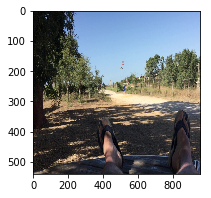

Showing Image: Pedestrians


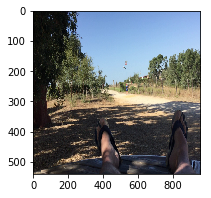

Showing Image: Pedestrians


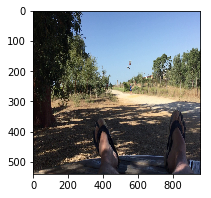

In [3]:
count = 0
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.resize(frame, None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    cv2.imshow('Pedestrians', frame, (3,3))
    count = count + 1
    if count > 2:
        break

cap.release()

In [42]:
cap.release()
cap = cv2.VideoCapture("./resources/spinning.mov")

In [43]:
#!pip install imageio
#!apt-get install libfreeimage-dev -y

In [44]:
import imageio

frames = []
for i in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret, frame = cap.read()
    frame = cv2.resize(frame, None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    frames.append(frame)
cap.release()
print("Storing")
imageio.mimsave('./resources/generated_gif.gif', np.array(frames))

Storing


In [49]:
from matplotlib import animation, rc
from IPython.display import HTML

RuntimeError: No MovieWriters available!

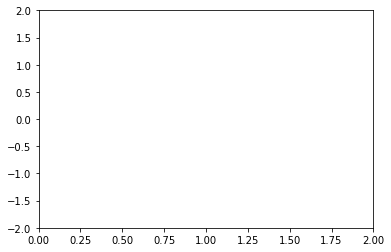

In [51]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)


# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())